In [ ]:
# Importer les dépendances
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as mso
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
# # Importer les données depuis Github
df_train = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Titanic/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Titanic/test.csv')
df_check = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Titanic/gender_submission.csv')

In [ ]:
# Explorer le dataframe df_train
print("Full train dataset shape is {}".format(df_train.shape))
print(df_train.info())
df_train.head(10)

Full train dataset shape is (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Explorer le dataframe df_test
print("Full test dataset shape is {}".format(df_train.shape))
print(df_test.info())
df_test.head(10)

Full test dataset shape is (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


<Axes: >

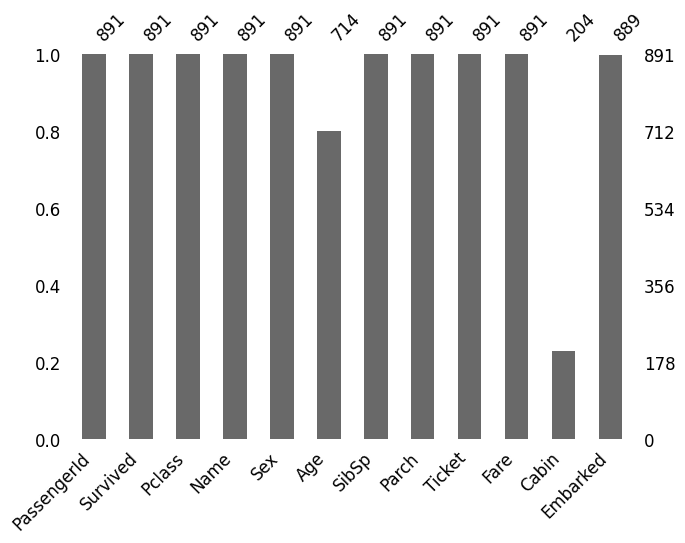

In [ ]:
# Afficher les valeurs manquantes de df_train
plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(df_train,ax=ax_train,fontsize = 12)

<Axes: >

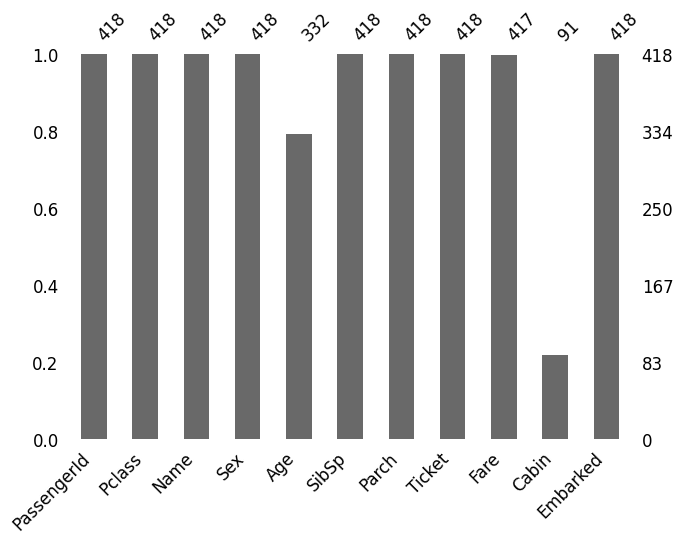

In [ ]:
# Afficher les valeurs manquantes de df_test
plt.figure(figsize=(16,5))
ax_test = plt.subplot(1,2,2)
mso.bar(df_test,ax=ax_test,fontsize = 12)

In [ ]:
# Creer la colonne SibSp_or_Parch pour indiquer le nombre de membres de la famille
# Remplacer valeurs manquantes par l'élement le plus fréquent des colonnes SibSp et Parch dans df_train et df_test
df_train['SibSp'].fillna(df_train['SibSp'].mode()[0], inplace=True)
df_train['Parch'].fillna(df_train['Parch'].mode()[0], inplace=True)
df_test['SibSp'].fillna(df_test['SibSp'].mode()[0], inplace=True)
df_test['Parch'].fillna(df_test['Parch'].mode()[0], inplace=True)

# Calcul du nombre de membres de la famille dans df_train et df_test
df_train['SibSp_or_Parch'] = df_train['SibSp'] + df_train['Parch']
df_test['SibSp_or_Parch'] = df_test['SibSp'] + df_test['Parch']


df_train[['SibSp','Parch','SibSp_or_Parch']]

,SibSp,Parch,SibSp_or_Parch
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0
...,...,...,...
886,0,0,0
887,0,0,0
888,1,2,3
889,0,0,0


In [ ]:
# Extraction de la colonne du résultat dans df_train
y_train = df_train['Survived']


# Séparation des colonnes en numerical_features et en categorical_features
list_numerical_features = ['Age', 'Fare']
list_categorical_features = ['Pclass', 'Sex', 'Embarked', 'SibSp_or_Parch']


# Suppression des colonnes à ignorer dans df_train et dans df_test
list_ignored_features = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Survived']
df_train.drop(columns = list_ignored_features, inplace=True, errors='ignore')
df_test.drop(columns = list_ignored_features, inplace=True, errors='ignore')

df_train

,Pclass,Sex,Age,Fare,Embarked,SibSp_or_Parch
0,3,male,22.0,7.2500,S,1
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,0
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,0
887,1,female,19.0,30.0000,S,0
888,3,female,NaN,23.4500,S,3
889,1,male,26.0,30.0000,C,0


In [ ]:
# Retraitement des categorical_features

# Remplacement des valeurs manquantes par l'élément le plus fréquent dans df_train et df_test
for col in list_categorical_features:
  df_train[col].fillna(df_train[col].mode()[0], inplace=True)
  df_test[col].fillna(df_test[col].mode()[0], inplace=True)

# Lister les valeurs uniques pour en verifier le nombre avant l'encodage des categorical_features
for col in list_categorical_features:
  print(f'List of unique values in column {col} in df_train : {df_train[col].unique()}')
  print(f'List of unique values in column {col} in df_test : {df_test[col].unique()}')

List of unique values in column Pclass in df_train : [3 1 2]
List of unique values in column Pclass in df_test : [3 2 1]
List of unique values in column Sex in df_train : ['male' 'female']
List of unique values in column Sex in df_test : ['male' 'female']
List of unique values in column Embarked in df_train : ['S' 'C' 'Q']
List of unique values in column Embarked in df_test : ['Q' 'S' 'C']
List of unique values in column SibSp_or_Parch in df_train : [ 1  0  4  2  6  5  3  7 10]
List of unique values in column SibSp_or_Parch in df_test : [ 0  1  2  4  3  5  7  6 10]


In [ ]:
# Retraitement des numerical_features

# Remplacement des valeurs manquantes par la moyenne de la colonne (mean) dans df_train et df_test
for col in list_numerical_features:
  df_train[col].fillna(round(df_train[col].mean(), 0), inplace=True)
  df_test[col].fillna(round(df_test[col].mean(), 0), inplace=True)

In [ ]:
# Encoder les categorical_features

label_encoder_Sex = LabelEncoder()
df_train['Sex'] = label_encoder_Sex.fit_transform(df_train['Sex'])
df_test['Sex'] = label_encoder_Sex.fit_transform(df_test['Sex'])

label_encoder_Embarked = LabelEncoder()
df_train['Embarked'] = label_encoder_Embarked.fit_transform(df_train['Embarked'])
df_test['Embarked'] = label_encoder_Embarked.fit_transform(df_test['Embarked'])

# Définir le dataframe x_train et x_test
x_train = df_train
x_test = df_test

x_train

,Pclass,Sex,Age,Fare,Embarked,SibSp_or_Parch
0,3,1,22.0,7.2500,2,1
1,1,0,38.0,71.2833,0,1
2,3,0,26.0,7.9250,2,0
3,1,0,35.0,53.1000,2,1
4,3,1,35.0,8.0500,2,0
...,...,...,...,...,...,...
886,2,1,27.0,13.0000,2,0
887,1,0,19.0,30.0000,2,0
888,3,0,30.0,23.4500,2,3
889,1,1,26.0,30.0000,0,0


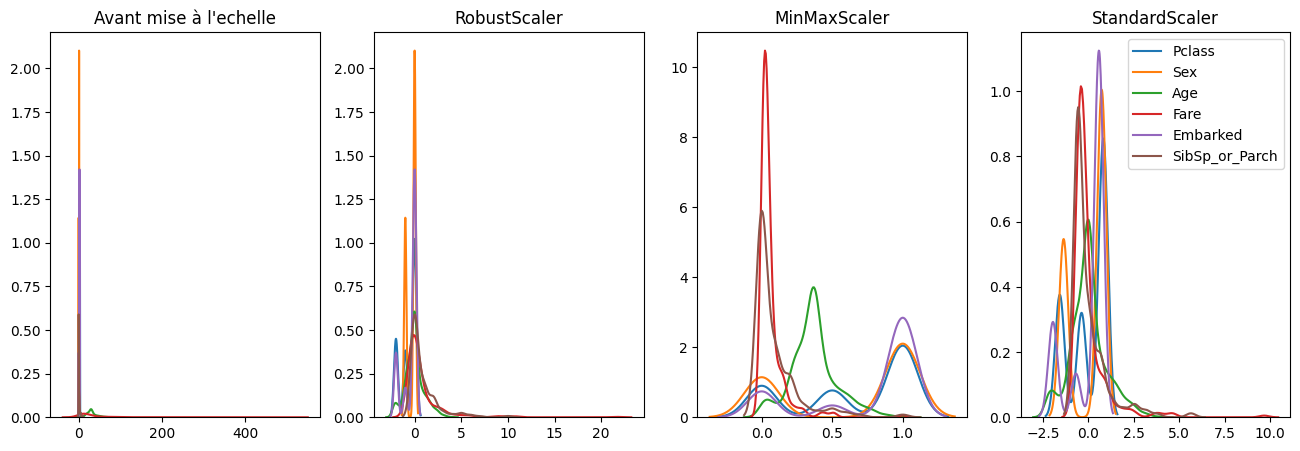

In [ ]:
# Tester differents types de mise à l'échelle

# Creation de la fonction pour visualiser les 3 types de mises à l'échelle
def plotGraphAll(pdf, pscaled1, pscaled2, pscaled3):
    fig, (a, b, c, d) = plt.subplots(ncols=4, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    b.set_title("RobustScaler")
    for col in pscaled1.columns:
        sns.kdeplot(pscaled1[col], ax=b)
    c.set_title("MinMaxScaler")
    for col in pscaled2.columns:
        sns.kdeplot(pscaled2[col], ax=c)
    d.set_title("StandardScaler")
    for col in pscaled3.columns:
        sns.kdeplot(pscaled3[col], ax=d)

    list_columns = pdf.columns
    plt.legend(list_columns)
    a.set_xlabel("")
    a.set_ylabel("")
    b.set_xlabel("")
    b.set_ylabel("")
    c.set_xlabel("")
    c.set_ylabel("")
    d.set_xlabel("")
    d.set_ylabel("")

    plt.show()


input_features = list(df_train.columns)

scaler = RobustScaler()
scaled_df_train_1 = scaler.fit_transform(df_train[input_features])
scaled_df_train_1 = pd.DataFrame(scaled_df_train_1, columns=input_features)

scaler = MinMaxScaler()
scaled_df_train_2 = scaler.fit_transform(df_train[input_features])
scaled_df_train_2 = pd.DataFrame(scaled_df_train_2, columns=input_features)

scaler = StandardScaler()
scaled_df_train_3 = scaler.fit_transform(df_train[input_features])
scaled_df_train_3 = pd.DataFrame(scaled_df_train_3, columns=input_features)


plotGraphAll(df_train[input_features], scaled_df_train_1, scaled_df_train_2, scaled_df_train_3)


In [ ]:
# Selection de MinMaxScaler et mise à l'échelle de x_train et x_test

sc = MinMaxScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Epoch 1/200
40/40 [==============================] - 3s 42ms/step - loss: 0.6168 - accuracy: 0.6174 - val_loss: 0.5893 - val_accuracy: 0.6339
Epoch 2/200
40/40 [==============================] - 1s 14ms/step - loss: 0.6058 - accuracy: 0.6242 - val_loss: 0.5836 - val_accuracy: 0.6508
Epoch 3/200
40/40 [==============================] - 1s 16ms/step - loss: 0.6033 - accuracy: 0.6460 - val_loss: 0.5794 - val_accuracy: 0.6610
Epoch 4/200
40/40 [==============================] - 1s 15ms/step - loss: 0.5959 - accuracy: 0.6477 - val_loss: 0.5734 - val_accuracy: 0.6644
Epoch 5/200
40/40 [==============================] - 1s 14ms/step - loss: 0.5921 - accuracy: 0.6443 - val_loss: 0.5686 - val_accuracy: 0.6780
Epoch 6/200
40/40 [==============================] - 1s 13ms/step - loss: 0.5954 - accuracy: 0.6560 - val_loss: 0.5650 - val_accuracy: 0.7017
Epoch 7/200
40/40 [==============================] - 0s 10ms/step - loss: 0.5853 - accuracy: 0.6644 - val_loss: 0.5601 - val_accuracy: 0.7288
Epoch 

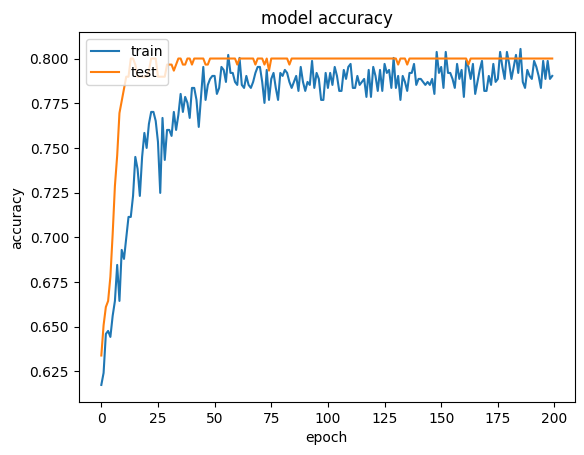

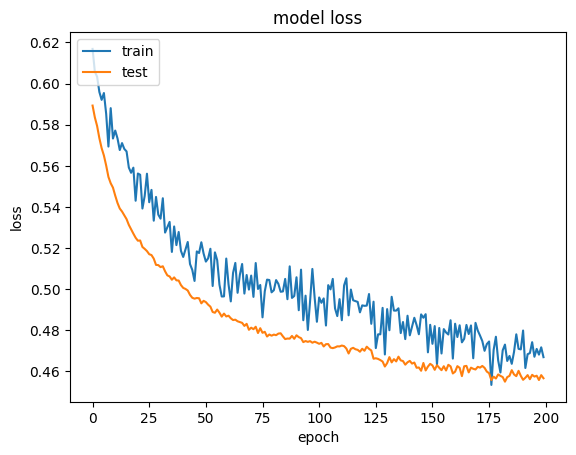

In [ ]:
# Creation du modele
classifier_model = tf.keras.Sequential()

#Input layer with 6 inputs neurons
classifier_model.add(tf.keras.layers.Dense(4, activation = 'relu', input_dim = 6))

# Hidden layers
classifier_model.add(tf.keras.layers.Dropout(0.15))
classifier_model.add(tf.keras.layers.Dense(2, activation = 'relu'))

# Output layer with 1 output neuron which will predict 1 or 0
classifier_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


# Compilation du modele
classifier_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Entrainement du modele
history = classifier_model.fit(x_train, y_train, validation_split=0.33, batch_size = 15, epochs = 200)
# avec :
# validation_split = 0.33 : 33% du jeu de données est utilisé pour évaluer les performances du modèle pendant l'entrainement.
# batch_size = 15 : les données d'entraînement sont divisées en mini-lots de taille 15
# epochs = 200 : 200 itérations complètes sur la totalité du jeu de données durant l'entrainement du modèle.


# Visualiser la précision du modèle
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Visualiser la fonction loss du modèle
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Caractéristiques du modèle
classifier_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 28        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Tester le modele sur le dataframe de test x_test
# En cas d'utilisation de nouvelles données non transformées par MinMaxScaler, une étape supplémentaire est nécessaires pour la mise à l'échelle.

prediction = classifier_model.predict(x_test).tolist()
se = pd.Series(prediction)

# Le df_check contient les résultats de x_test
# Ajout des predictions du modele à df_check
df_check['check'] = se
df_check['check'] = df_check['check'].str.get(0)

# Retraiter le résultat numérique en valeur booléenne (True / False)
series = []
for val in df_check.check:
    if val >= 0.5:
        series.append(1)
    else:
        series.append(0)

df_check['final'] = series


# Boucle pour compter les prédictions correctes
match = 0
nomatch = 0
for val in df_check.values:
    if val[1] == val[3]:
        match = match +1
    else:
        nomatch = nomatch +1

# Afficher les resultats
print(f"Predictions correctes: {match} ({round(match/(match+nomatch)*100,2)}%)")
print(f"Predictions incorrectes: {nomatch} \n")

df_check

14/14 [==============================] - 0s 1ms/step
Predictions correctes: 413 (98.8%)
Predictions incorrectes: 5 



,PassengerId,Survived,check,final
0,892,0,0.185777,0
1,893,1,0.553484,1
2,894,0,0.195043,0
3,895,0,0.189775,0
4,896,1,0.582371,1
...,...,...,...,...
413,1305,0,0.180441,0
414,1306,1,0.831710,1
415,1307,0,0.155943,0
416,1308,0,0.180441,0
